# SAM 1-channel version: only DWI

In [1]:
channels = "1C=DWI"
#channels = "3C=DWI_ADC_b0"
#channels = "3C=DWI_ADC_DifDif"

In [2]:
# Loads all methods and data for testing on JAS
from methods_for_testing_MedSAM import *

/home/rosengaard/miniforge3/envs/medsam/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/rosengaard/miniforge3/envs/medsam/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Subject: 1
Slice 1 of 10
Dice for slice: 0.3


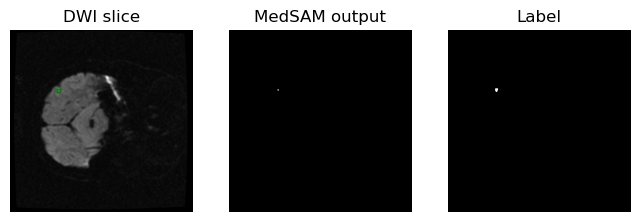

Slice 2 of 10
Dice for slice: 0.447


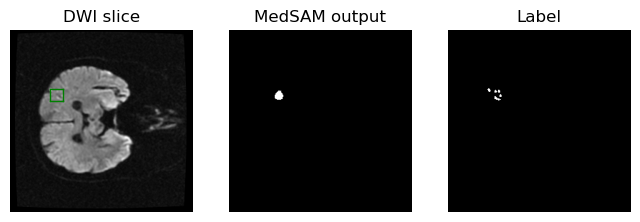

Slice 3 of 10
Dice for slice: 0.603


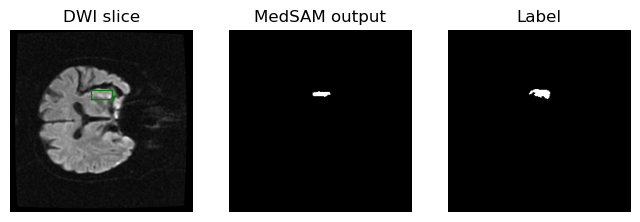

Slice 4 of 10
Dice for slice: 0.619


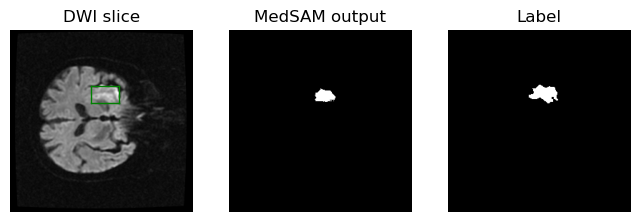

Slice 5 of 10
Dice for slice: 0.38


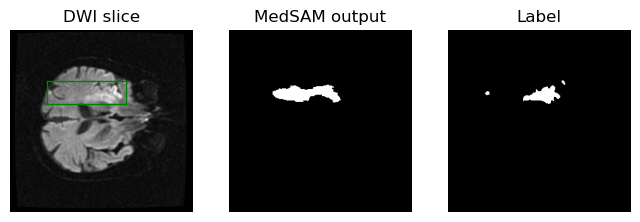

Slice 6 of 10
Dice for slice: 0.41


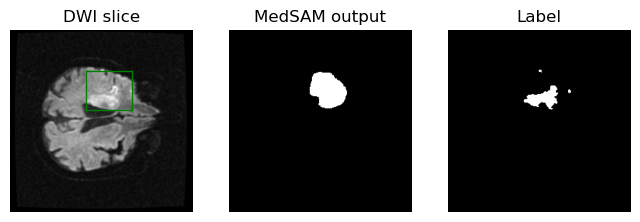

Slice 7 of 10
Dice for slice: 0.117


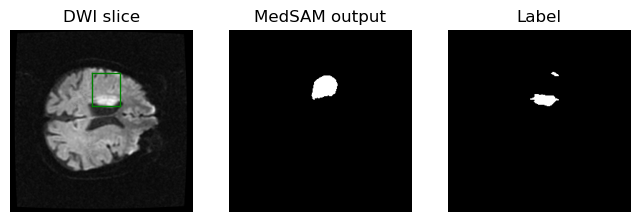

Slice 8 of 10
Dice for slice: 0.007


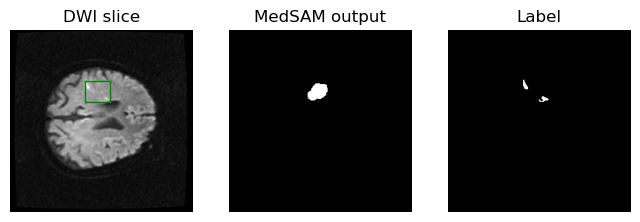

Slice 9 of 10
Dice for slice: 0.013


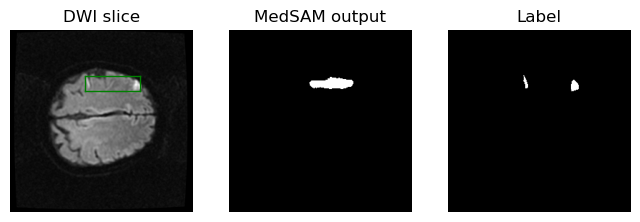

Slice 10 of 10
Dice for slice: 0.169


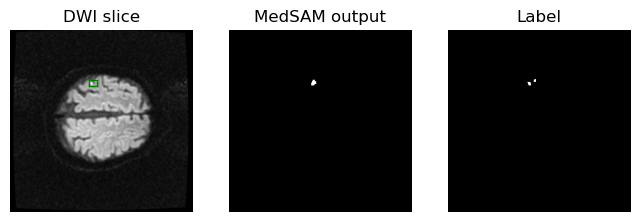

Mean dice for subject: 0.306
_____________________________
Subject: 2
Slice 1 of 1
Dice for slice: 0.887


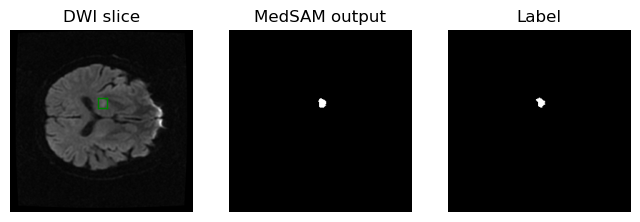

Mean dice for subject: 0.887
_____________________________
Subject: 3
Slice 1 of 10
Dice for slice: 0.157


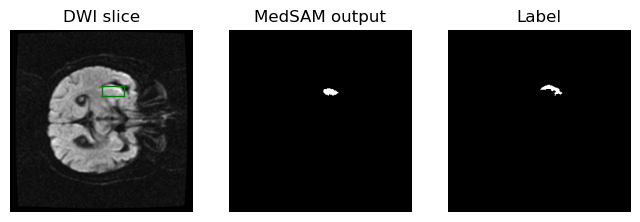

Slice 2 of 10
Dice for slice: 0.405


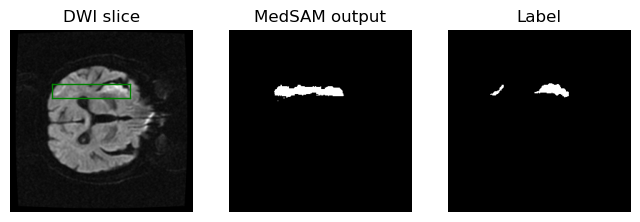

Slice 3 of 10
Dice for slice: 0.281


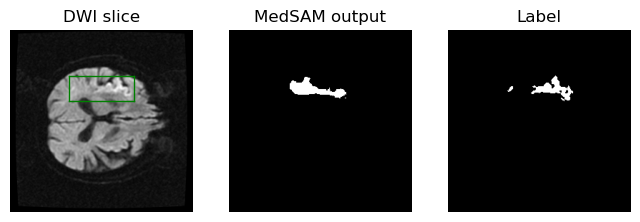

Slice 4 of 10
Dice for slice: 0.644


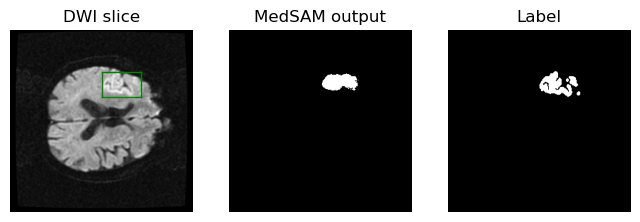

Slice 5 of 10
Dice for slice: 0.527


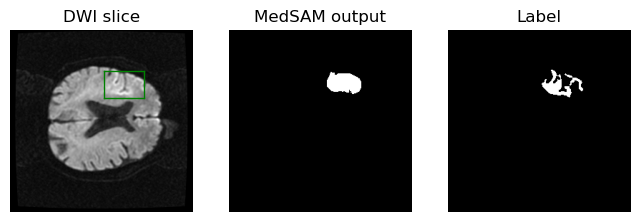

Slice 6 of 10
Dice for slice: 0.698


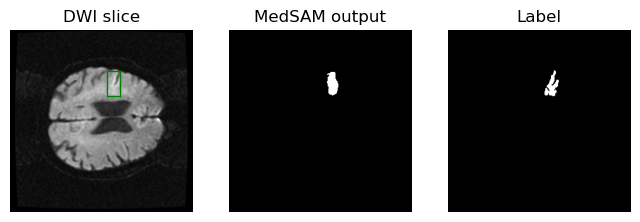

Slice 7 of 10
Dice for slice: 0.247


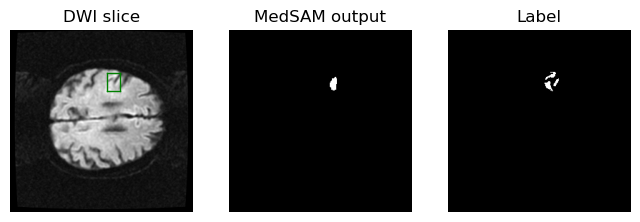

Slice 8 of 10
Dice for slice: 0.556


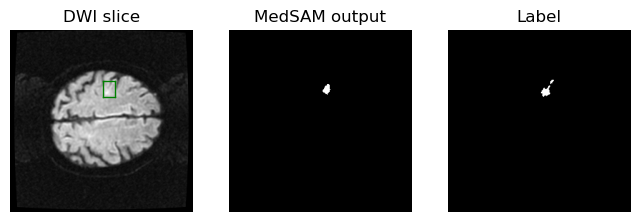

Slice 9 of 10
Dice for slice: 0.13


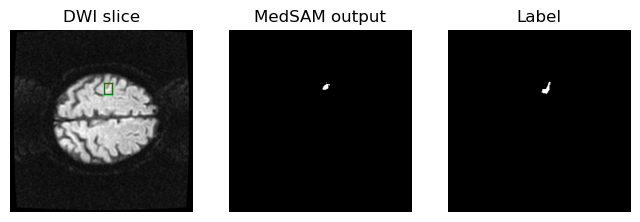

Slice 10 of 10
Dice for slice: 0.452


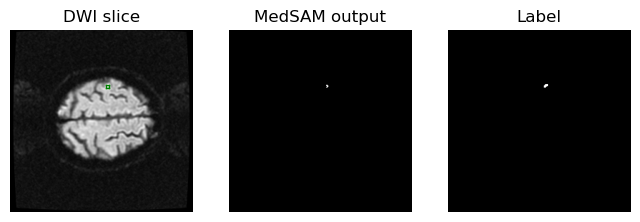

Mean dice for subject: 0.41
_____________________________
Subject: 4
Slice 1 of 10
Dice for slice: 0.623


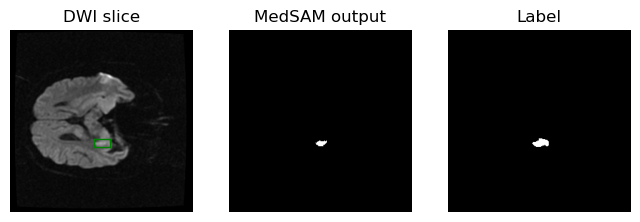

Slice 2 of 10
Dice for slice: 0.52


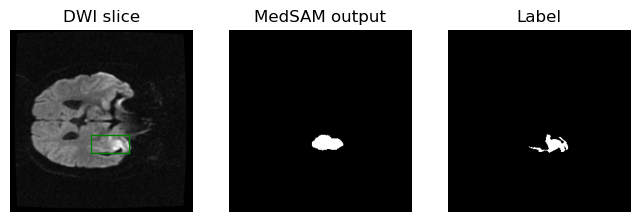

Slice 3 of 10
Dice for slice: 0.79


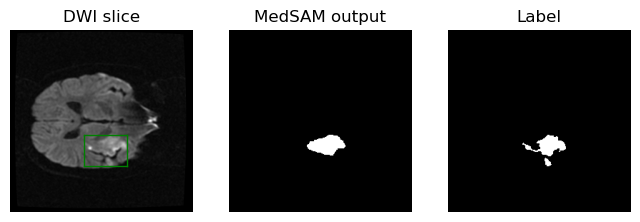

Slice 4 of 10
Dice for slice: 0.763


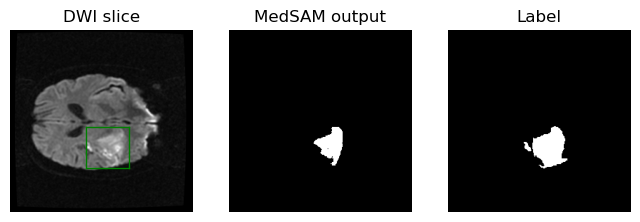

Slice 5 of 10
Dice for slice: 0.938


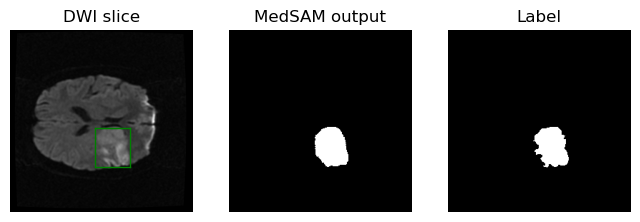

Slice 6 of 10
Dice for slice: 0.773


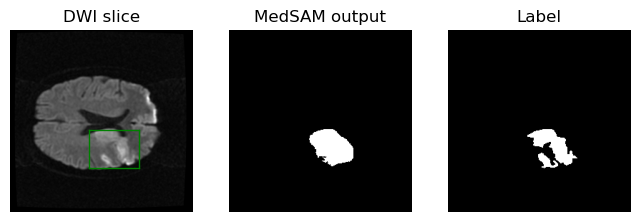

Slice 7 of 10
Dice for slice: 0.733


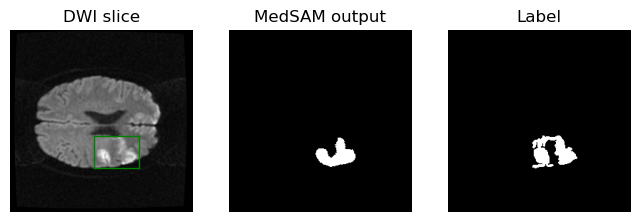

Slice 8 of 10
Dice for slice: 0.261


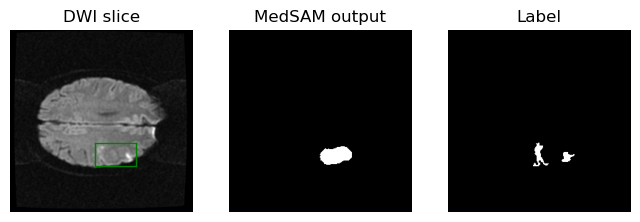

Slice 9 of 10
Dice for slice: 0.701


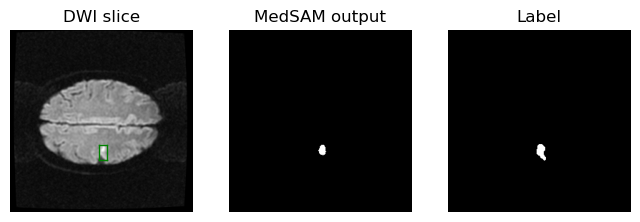

Slice 10 of 10
Dice for slice: 0.906


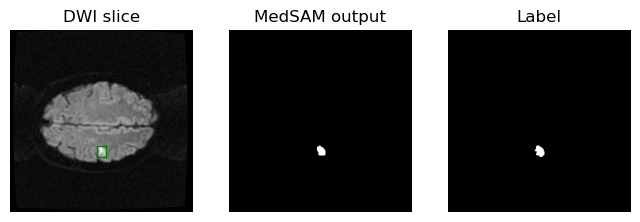

Mean dice for subject: 0.701
_____________________________
Subject: 5
Slice 1 of 4
Dice for slice: 0.81


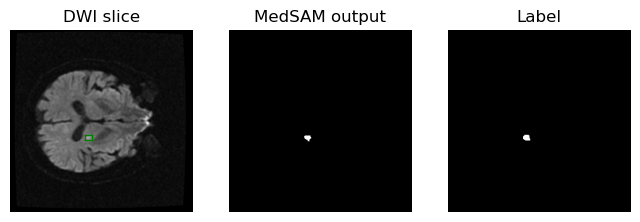

Slice 2 of 4
Dice for slice: 0.792


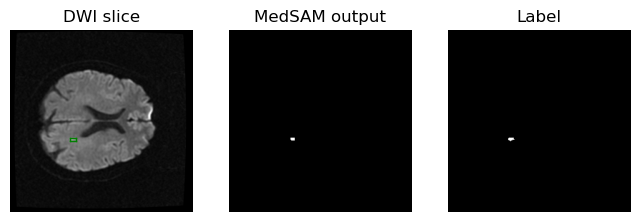

Slice 3 of 4
Dice for slice: 0.424


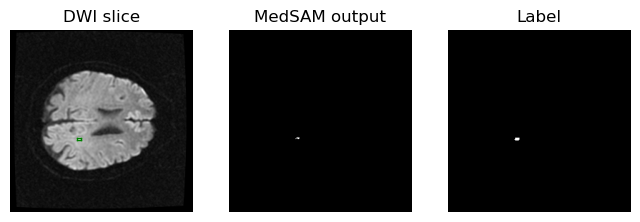

Slice 4 of 4
Dice for slice: 0.091


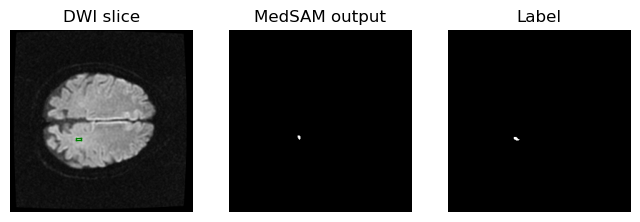

Mean dice for subject: 0.529
_____________________________
Subject: 6
Slice 1 of 7
Dice for slice: 0.46


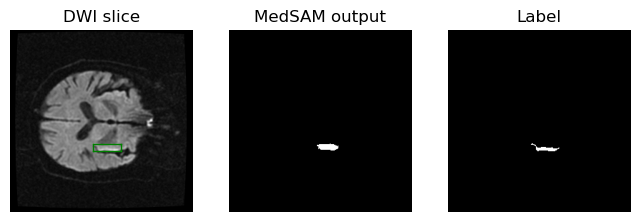

Slice 2 of 7
Dice for slice: 0.696


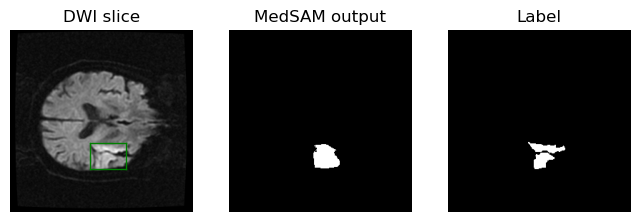

Slice 3 of 7
Dice for slice: 0.759


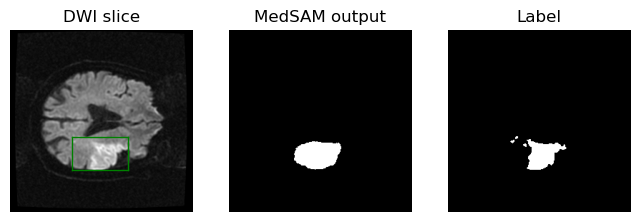

Slice 4 of 7
Dice for slice: 0.677


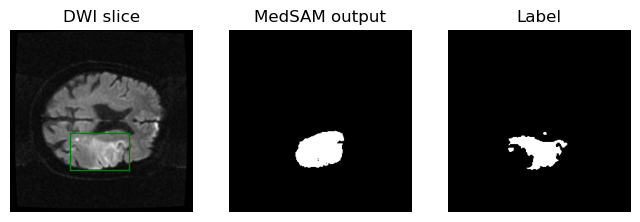

Slice 5 of 7
Dice for slice: 0.644


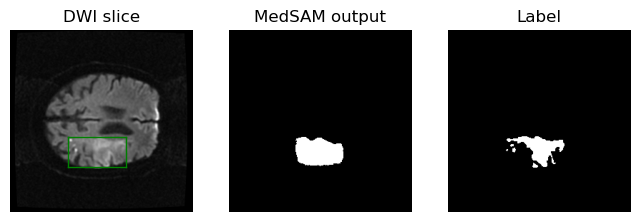

Slice 6 of 7
Dice for slice: 0.263


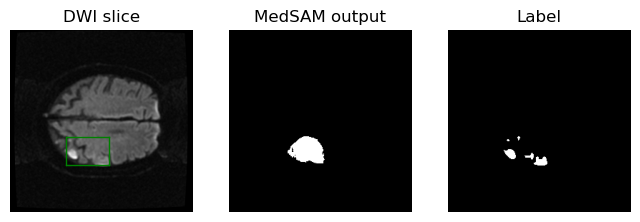

Slice 7 of 7
Dice for slice: 0.071


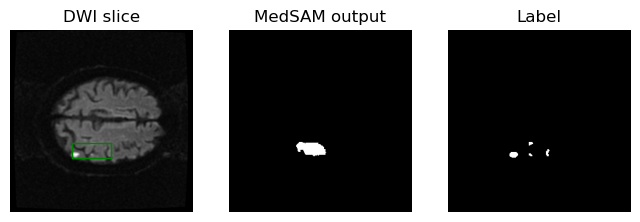

Mean dice for subject: 0.51
_____________________________
Subject: 7
Slice 1 of 6
Dice for slice: 0.829


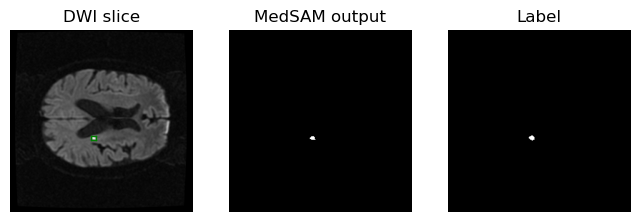

Slice 2 of 6
Dice for slice: 0.211


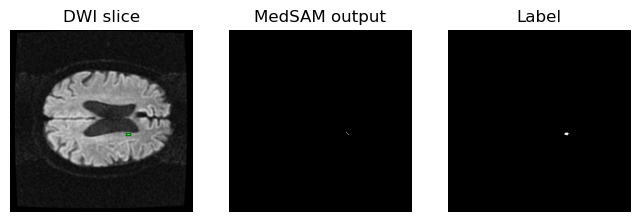

Slice 3 of 6
Dice for slice: 0.556


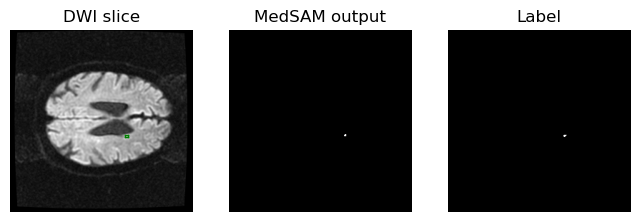

Slice 4 of 6
Dice for slice: 0.66


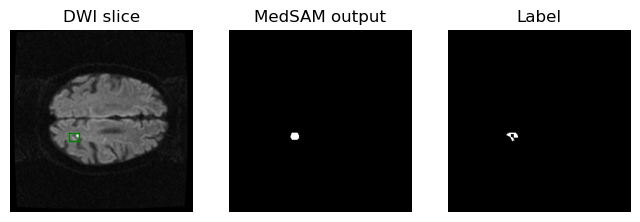

Slice 5 of 6
Dice for slice: 0.049


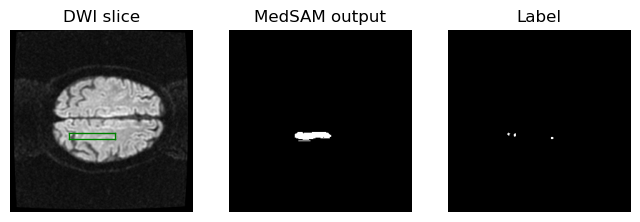

Slice 6 of 6
Dice for slice: 0.042


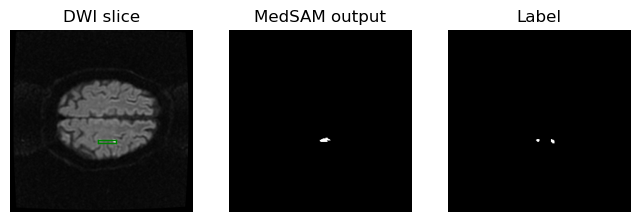

Mean dice for subject: 0.391
_____________________________
Subject: 8
Slice 1 of 10
Dice for slice: 0.649


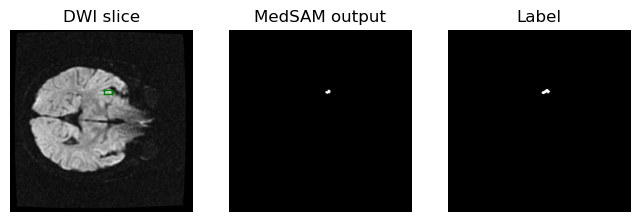

Slice 2 of 10
Dice for slice: 0.816


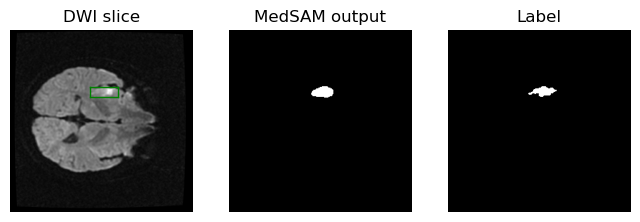

Slice 3 of 10
Dice for slice: 0.863


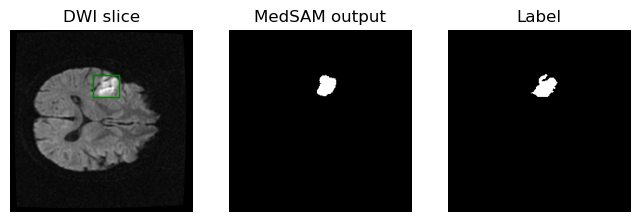

Slice 4 of 10
Dice for slice: 0.953


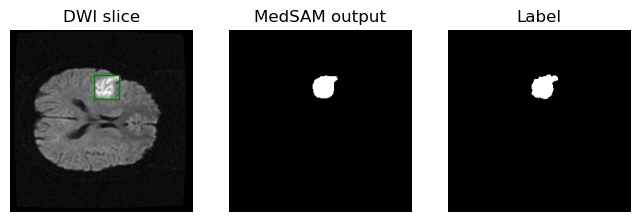

Slice 5 of 10
Dice for slice: 0.835


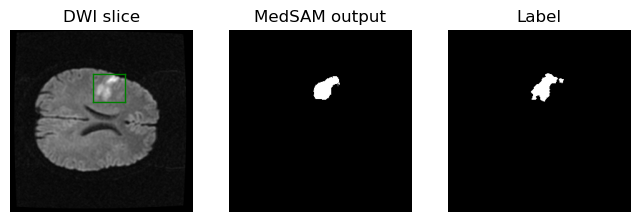

Slice 6 of 10
Dice for slice: 0.505


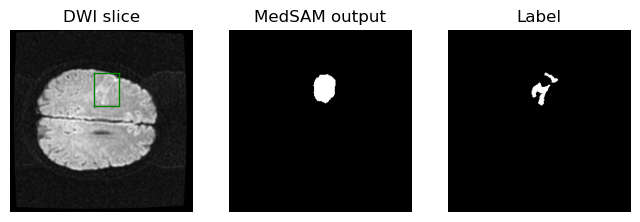

Slice 7 of 10
Dice for slice: 0.205


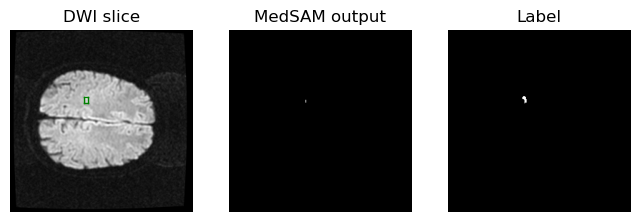

Slice 8 of 10
Dice for slice: 0.688


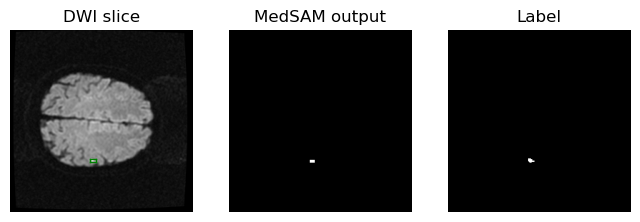

Slice 9 of 10
Dice for slice: 0.143


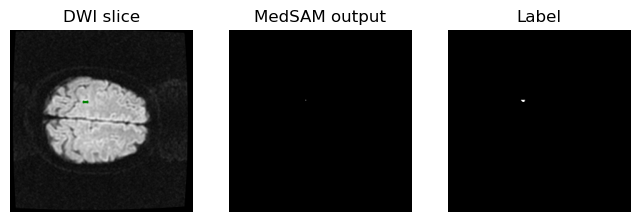

Slice 10 of 10
Dice for slice: 0.524


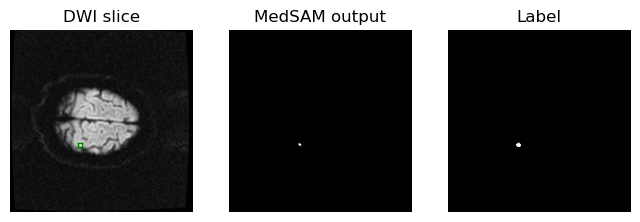

Mean dice for subject: 0.618
_____________________________
__________________________________________________________________
Mean dice for each subject: [0.3063675853137196, 0.8868778280542986, 0.4096048841016995, 0.7006972889956924, 0.5293804251780239, 0.5100019869645489, 0.3908980910844755, 0.6181347112797858]

Mean dice for all subjects: 0.5439953501215306


In [3]:
#Test loop
model = MSSD(medsam_model)
Avg_Dice_subjects = []
Dice_for_subjects = []
for idx in range(0,len(data)):
    dice_score_vol = []
    print('Subject:',idx+1)

    #Load data:
    DWI_path, ADC_path, b0_path, label_path = data[idx]
    input_vol = get_volume(DWI_path, ADC_path, b0_path, channels)

    # Get the bounding_box to prompt SAM:
    label_vol = nib.load(label_path).get_fdata()
    prompt = get_bounding_box(label_vol, False)

    ii = 0
    for i in range(len(input_vol[0,0,0,:])):
        label_slice = label_vol[:,:,i]
        if np.sum(label_slice) > 0:
            print('Slice',ii+1,'of',len(prompt))
            slice = input_vol[:,:,:,i]
            model_output = model.get_segmentationsMask(slice, prompt[ii])
            model_output = model_output[0]
            model_output = model_output[:,:,0]
            bbox = prompt[ii]
            ii += 1

            #Dice:
            dice_score_slice = Find_DICE_slice(model_output, label_slice)
            dice_score_vol.append(dice_score_slice)
            print('Dice for slice:', round(dice_score_slice,3))

            #Plot:
            plotFunc(slice[:,:,0], model_output, label_slice, bbox)
    
    Dice_for_subjects.append(dice_score_vol)
    Avg_Dice_subjects.append(mean(dice_score_vol))
    print('Mean dice for subject:', round(mean(dice_score_vol),3))
    print('_____________________________')
print('__________________________________________________________________')
print('Mean dice for each subject:', Avg_Dice_subjects)
print('')
print('Mean dice for all subjects:', mean(Avg_Dice_subjects))

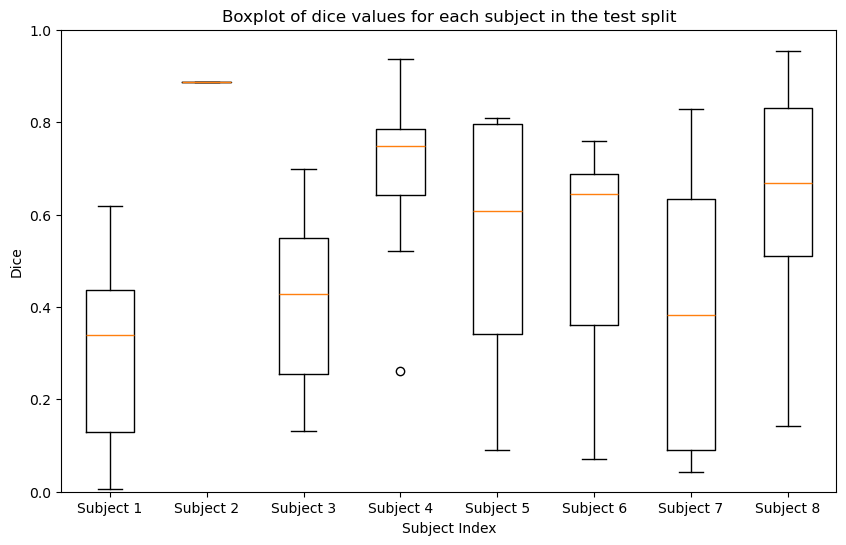

In [5]:
# Example data: a list of lists
data = Dice_for_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()